In [1]:
import numpy as np
import pandas as pd
import databricks.koalas as ks

In [2]:
pser = pd.Series([1, 2, 3, 4, 5])

kser1 = ks.Series([1, 2, 3, 4, 5])
kser2 = ks.Series(pser)
kser3 = ks.from_pandas(pser)

In [3]:
pdf = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})

kdf1 = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})
kdf2 = ks.DataFrame(pdf)
kdf3 = ks.from_pandas(pdf)

In [4]:
pidx = pd.Index([1, 2, 3, 4, 5])

kidx1 = ks.Index([1, 2, 3, 4, 5])
kidx2 = ks.Index(pidx)
kidx3 = ks.from_pandas(pidx)

In [5]:
kdf = ks.from_pandas(pdf)

In [6]:
kdf.head()

,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [7]:
kdf.describe()

,A,B
count,5.000000,5.000000
mean,3.000000,30.000000
std,1.581139,15.811388
min,1.000000,10.000000
25%,2.000000,20.000000
50%,3.000000,30.000000
75%,4.000000,40.000000
max,5.000000,50.000000


In [8]:
kdf.sort_index(ascending=False)

,A,B
4,5,50
3,4,40
2,3,30
1,2,20
0,1,10


In [9]:
kdf.sort_values(by='B')

,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [10]:
kdf.transpose()

,0,1,2,3,4
A,1,2,3,4,5
B,10,20,30,40,50


In [11]:
# kdf.tail()

In [12]:
kdf['A']

0    1
1    2
2    3
3    4
4    5
Name: A, dtype: int64

In [13]:
kdf.B

0    10
1    20
2    30
3    40
4    50
Name: B, dtype: int64

In [14]:
kdf[['A', 'B']]

,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [15]:
kdf[1:2]

,A,B
1,2,20
2,3,30


In [16]:
kdf.B[1:2]

1    20
2    30
Name: B, dtype: int64

In [17]:
kdf.iloc[3]

A     4
B    40
Name: 3, dtype: int64

In [18]:
kdf.iloc[3, 1]

40

In [19]:
kdf.iloc[:, 1]

0    10
1    20
2    30
3    40
4    50
Name: B, dtype: int64

In [20]:
kdf.iloc[:, 1:2]

,B
0,10
1,20
2,30
3,40
4,50


In [21]:
kdf.iloc[:3, 1]

0    10
1    20
2    30
Name: B, dtype: int64

In [22]:
kdf.iloc[:3, 1:2]

,B
0,10
1,20
2,30


In [23]:
# kdf.iloc[1:3, 1]
# kdf.iloc[1:3, 1:2]

In [24]:
from databricks.koalas.config import set_option, reset_option
kser = ks.Series([1, 2, 3, 4, 5], index=[0, 1, 2, 3, 4])
set_option("compute.ops_on_diff_frames", True)
kdf['C'] = kser
reset_option("compute.ops_on_diff_frames")

In [25]:
# from databricks.koalas.config import option_context
# with option_context("compute.ops_on_diff_frames", True):
#     kdf['C'] = kser

In [26]:
# kdf.at[3, 'B'] = 100
# kdf.iat[2, 1] = 100

In [27]:
kdf.isna()

,A,B,C
0,False,False,False
1,False,False,False
3,False,False,False
2,False,False,False
4,False,False,False


In [28]:
kdf.dropna()

,A,B,C
0,1,10,1
1,2,20,2
3,4,40,4
2,3,30,3
4,5,50,5


In [29]:
kdf.fillna(value=100)

,A,B,C
0,1,10,1
1,2,20,2
3,4,40,4
2,3,30,3
4,5,50,5


In [30]:
kdf.apply(np.cumsum)

,A,B,C
0,1,10,1
1,3,30,3
3,7,70,7
2,10,100,10
4,15,150,15


In [31]:
kdf.apply(np.cumsum, axis=1)

,A,B,C
0,1,11,12
1,2,22,24
3,4,44,48
2,3,33,36
4,5,55,60


In [32]:
kdf.apply(lambda x: x ** 2)

,A,B,C
0,1,100,1
1,4,400,4
3,16,1600,16
2,9,900,9
4,25,2500,25


In [33]:
def square(x) -> ks.Series[np.int32]:
    return x ** 2

In [34]:
kdf.apply(square)

,A,B,C
0,9,900,9
1,25,2500,25
2,1,100,1
3,16,1600,16
4,4,400,4


In [35]:
ks.DataFrame({'A': range(1001)}).apply(lambda col: col.max())

A     165
A     580
A     331
A     497
A     829
A     414
A     746
A     663
A     912
A    1000
A     248
A      82
Name: 0, dtype: int64

In [36]:
kdf.groupby('A').sum()

,B,C
A,,
5,50,5
1,10,1
3,30,3
2,20,2
4,40,4


In [37]:
kdf.groupby(['A', 'B']).sum()

,,C
A,B,
3,30,3
5,50,5
2,20,2
1,10,1
4,40,4


In [38]:
# This is needed for visualizing plot on notebook
%matplotlib inline

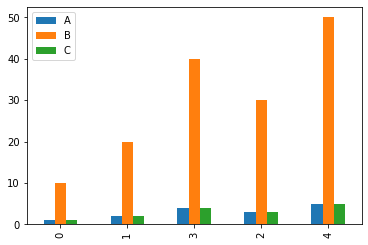

In [39]:
kdf.plot.bar()

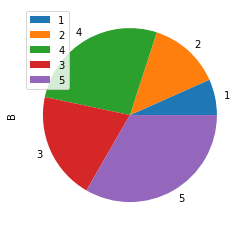

In [40]:
kdf.plot.pie(x='A', y='B')

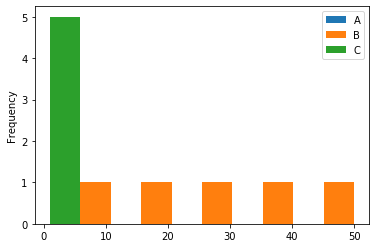

In [41]:
kdf.plot.hist()

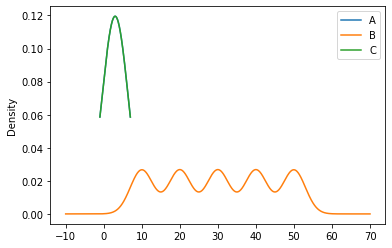

In [42]:
kdf.plot.kde(bw_method=3)

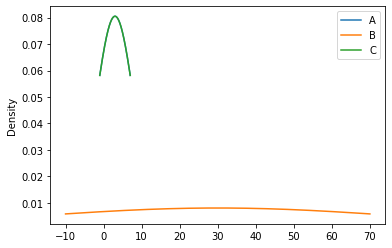

In [43]:
kdf.to_pandas().plot.kde(bw_method=3)

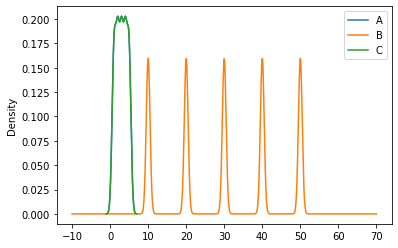

In [44]:
kdf.plot.density(bw_method=0.5)

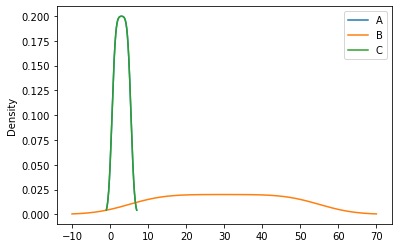

In [45]:
kdf.to_pandas().plot.density(bw_method=0.5)

In [46]:
pidx = pd.Index([1, 2, 3, 4, 5])

kidx1 = ks.Index([1, 2, 3, 4, 5])
kidx2 = ks.Index(pidx)
# kidx1 == kidx2

In [47]:
kidx1.to_pandas() == kidx2.to_pandas()

array([ True,  True,  True,  True,  True])

In [48]:
# from databricks.koalas.config import option_context
# with option_context("compute.ops_on_diff_frames", True):
#     kidx1.equals(kidx2)

In [49]:
long_series = ks.Series(np.random.randn(1000))
# long_series.tail(3)

In [50]:
# same as `ks.from_pandas(long_series.to_pandas().tail(3))`
long_series.to_pandas().tail(3)
ks.from_pandas(pdf)

,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [51]:
# kdf = ks.DataFrame({'A': 1.,
#                     'B': ks.Timestamp('20130102'),
#                     'C': ks.Series(1, index=list(range(4)), dtype='float32'),
#                     'D': np.array([3] * 4, dtype='int32'),
#                     'F': 'foo'})

In [52]:
kdf = ks.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'F': 'foo'})

In [53]:
i = pd.date_range('2018-04-09', periods=4, freq='1D20min')
ts = ks.DataFrame({'A': [1, 2, 3, 4]}, index=i)
# ts.between_time('0:15', '0:45')

In [54]:
ts.to_pandas().between_time('0:15', '0:45')

,A
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3


In [55]:
ts.map_in_pandas(func=lambda pdf: pdf.between_time('0:15', '0:45'))

,A
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3


In [56]:
kdf = ks.DataFrame({'A': range(10000)})

In [ ]:
kdf.map_in_pandas(func=lambda pdf: pd.DataFrame([pdf.max()]))

In [ ]:
kdf = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})

In [ ]:
sdf = kdf.to_spark()

In [ ]:
type(sdf)

In [ ]:
sdf.show()

In [ ]:
kdf = sdf.to_koalas()

In [ ]:
type(kdf)

In [ ]:
kdf

In [ ]:
sdf.to_koalas(index_col='A')

In [ ]:
kdf.rank().explain()

In [ ]:
cached_kdf = kdf.cache()

In [ ]:
cached_kdf.unpersist()

In [ ]:
with kdf.cache() as cached_kdf:
    print(cached_kdf.count())

In [ ]:
kdf = ks.from_pandas(pdf)

In [ ]:
pdf = kdf.to_pandas()

In [ ]:
sdf = kdf.to_spark()